In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
from madftnn.dataset.dataset_unified import HamiltonianDataset_qhnet_clean

ModuleNotFoundError: No module named 'madftnn'

In [36]:
npzfile = np.load('/home/weixinran/erpailuo/se_3_equivariant_prediction/model/modules/pindex_dict.npy',allow_pickle=True)
npzfile.item().keys()

dict_keys([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 3])

In [2]:
index_dict = {}
for size in range(166,167):
    idx = []
    idy = []
    for i in range(size*(size-1)):
        if i%(size-1) == 0:
            n = size-1
            idx += list(np.concatenate([[i]*(n-1) for i in range(n)])+(i-i%(size-1)))
            idy += list(np.concatenate([[j for j in range(n) if j != i] for i in range(n)])+(i-i%(size-1)))
    index_dict[size] = (idx,idy)

In [3]:
np.save('/home/weixinran/erpailuo/se_3_equivariant_prediction/model/modules/pindex_dict_166.npy',index_dict)

In [3]:
import torch  
import pandas as pd    

# 假设你的 tensor 是 a  
a = torch.tensor([[1, 2], [3, 4], [1, 2], [5, 6], [5, 6], [3, 4]])  
   
# 将Tensor转换为Pandas DataFrame  
df = pd.DataFrame(a.numpy())  
  
# 对DataFrame进行排序并重置索引  
df = df.sort_values(by=[0,1]).reset_index()  
  
# 创建一个新的Tensor，其中包含原始位置的索引  
indices = torch.tensor(df['index'].values).view(-1, 2)  
  
# 对新的索引Tensor进行排序，使得索引回到原始顺序  
_, sorted_idx = torch.sort(indices.view(-1), dim=0)  
indices = indices.view(-1)[sorted_idx].view(-1, 2)  
  
print(indices)  


tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [2]:
# dataset = QH9Dynamic(split='geometry')
# dataset = QH9Stable(split='random')
train = HamiltonianDataset_qhnet_clean("used_data/QH9_Dynamic.db")

In [5]:
R, E, F, H, S, C, A, G, Z = train[0]

(166, 166)

In [8]:
def pairwise_distances(coords):
    dists = np.zeros((coords.shape[0], coords.shape[0]))
    for i in range(coords.shape[0]):
        for j in range(i+1, coords.shape[0]):
            dists[i][j] = np.sqrt(np.sum((coords[i]-coords[j])**2))
            dists[j][i] = dists[i][j]
    return dists

what molecules are in qm9

In [2]:
train = HamiltonianDataset_qhnet_clean("used_data/QH9.db")

In [16]:
R, E, F, H, S, C, A, G, Z = train[78587]
# R, E, F, H, S, C, A, G, Z = train1[9]

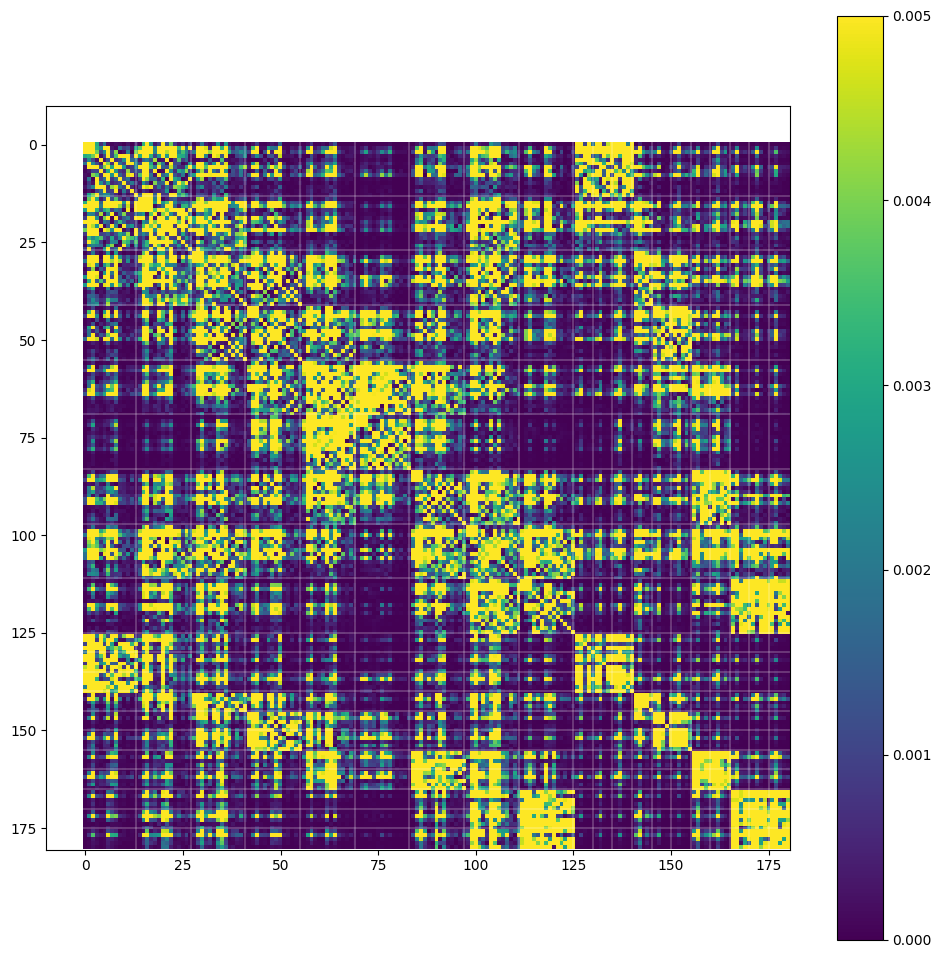

In [12]:
pos = [0]
count = 0
switch_list = {1:5,6:14,7:14,8:14}
for num in Z:
    count += switch_list[num]
    pos.append(count)

plt.figure(figsize=(12,12))
heatmap = plt.imshow((abs(H-C)))
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 0.005)
for i in range(len(pos)-1):
    plt.axhline(y=pos[i]-1, color='w',linewidth=0.3)
    plt.axvline(x=pos[i]-1, color='w',linewidth=0.3)
plt.show()

In [13]:
mean_gap = np.zeros((len(pos)-1,len(pos)-1))
for i in range(len(pos)-1):
    for j in range(len(pos)-1):
        mean_gap[i,j] = abs((H-C)[pos[i]:pos[i+1],pos[j]:pos[j+1]]).mean()

In [17]:
mean_gap

array([[9.98442620e-03, 6.10417174e-03, 3.67397163e-03, 1.67582324e-03,
        1.43805810e-03, 3.16424266e-04, 1.95235922e-03, 3.88395181e-03,
        1.09115953e-03, 1.06231468e-02, 1.08044464e-02, 1.06877256e-02,
        1.78674655e-03, 6.77138276e-04, 1.42249826e-03, 8.31002311e-04,
        1.58209912e-03, 5.81594824e-04, 6.45357533e-04, 3.69693065e-04],
       [6.10417128e-03, 1.33241685e-02, 7.52748922e-03, 2.92264204e-03,
        2.04809615e-03, 2.33405779e-04, 3.35593242e-03, 7.99470861e-03,
        3.43974750e-03, 5.35413763e-03, 5.21078473e-03, 4.27149795e-03,
        5.49363391e-03, 1.08387833e-03, 1.77690235e-03, 1.31533062e-03,
        1.89479184e-03, 1.80046307e-03, 2.61427532e-03, 1.53838214e-03],
       [3.67397186e-03, 7.52748922e-03, 1.10637071e-02, 6.96972758e-03,
        4.41774400e-03, 9.42317653e-04, 4.22353391e-03, 7.89984874e-03,
        3.81980743e-03, 2.30118353e-03, 1.93643954e-03, 2.80123716e-03,
        1.02186454e-02, 5.31824864e-03, 5.45426086e-03, 2.2331

In [4]:
# wanji = [[6,1,1,1,1],[6,6,1,1,1,1,1,1],[6,6,6,1,1,1,1,1,1,1,1],[6,6,6,6,1,1,1,1,1,1,1,1,1,1],[6,6,6,6,6,1,1,1,1,1,1,1,1,1,1,1,1],
#          [6,6,6,6,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[6,6,6,6,6,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
#          [6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# wanji = [[6,8,1,1,1,1],[6,6,8,1,1,1,1,1,1],[6,6,6,8,1,1,1,1,1,1,1,1]]
# wanji = [[6,8,1,1],[6,6,8,1,1,1,1],[6,6,6,8,1,1,1,1,1,1]]
# wanji = [[6,6,1,1,1,1],[6,6,1,1],[6,1,1,1,1]]

# ['O', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H']
wanji = [8,6,6,6,6,6,6,6,6,1,1,1,1,1,1,1,1,1,1,1,1]
count = 0
for i in range(len(train)):
    R, E, F, H, S, C, A, G, Z = train[i]
    if list(Z) == wanji:
    # if sum(list(Z))==40:
        # print(i,Z)
        count+=1
print(count)

531


fock matrix during the pyscf cycle

In [ ]:
mat_final = np.load('inter_hami_1/7_H.npy')
gap = []
for file in sorted(os.listdir('inter_hami_1')):
    mat = np.load('inter_hami_1/'+file)
    print(abs(mat-mat_final).mean(),file)
    gap.append(abs(mat-mat_final).mean())

In [ ]:
mat1 = np.load('inter_hami/3_H.npy')
mat2 = np.load('inter_hami/hami_pred.npy')
abs(mat1-mat2).mean()

In [ ]:
mat_final = np.load('inter_hami/7_Hnpy')
for file in sorted(oslistdir('inter_hami')):
    mat = np.load('inter_hami/'+file)
    heatmap = plt.imshow(abs(mat-mat_final))
    colorbar = plt.colorbar(heatmap)
    heatmap.set_clim(0, 0.005)
    plt.show()
    # print(abs(mat-mat_final).mean(),file)

read sdf file

In [2]:
def mol_to_xyz(mol):  
    atom_symbols = []  
    atom_coordinates = []  
  
    # 获取原子符号和坐标  
    for atom in mol.GetAtoms():  
        atom_symbols.append(atom.GetSymbol())  
        pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())  
        atom_coordinates.append([pos.x, pos.y, pos.z])  
  
    # 生成XYZ格式字符串  
    xyz_string = str(len(atom_symbols)) + '\n\n'  
    for symbol, coords in zip(atom_symbols, atom_coordinates):  
        xyz_string += '{} {:.6f} {:.6f} {:.6f}\n'.format(symbol, coords[0], coords[1], coords[2])  
  
    return xyz_string  

In [3]:
def mol_to_atom(mol):  
    atom_symbols = []  
    atom_coordinates = []  
  
    # 获取原子符号和坐标  
    for atom in mol.GetAtoms():  
        atom_symbols.append(atom.GetSymbol())  
        pos = mol.GetConformer().GetAtomPosition(atom.GetIdx())  
        atom_coordinates.append([pos.x, pos.y, pos.z])  
  
    return atom_symbols,atom_coordinates

In [30]:
from rdkit import Chem  
from rdkit.Chem import Draw  
  
# 读取SDF文件  
sdf_file = "bigger_mole/wanji_none_straight/Conformer3D_COMPOUND_CID_12391.sdf"  
suppl = Chem.SDMolSupplier(sdf_file, removeHs = False)  
  
# 遍历SDF文件中的所有分子结构  
# for mol in suppl:  
#     if mol is not None:  
#         print(Chem.MolToMolBlock(mol))  
  
# 绘制第一个分子的结构图（如果需要）  
mol1 = suppl[0] 
xyz_string = mol_to_xyz(mol1)
Z,R = mol_to_atom(mol1)
len(Z)

47

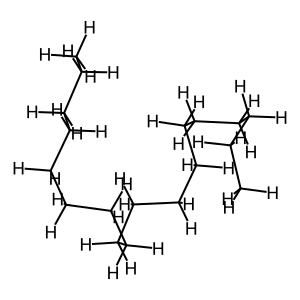

In [29]:
# 为分子生成结构图  
img = Draw.MolToImage(mol1, size=(300, 300)) 

# 显示图像  
img.show() 

In [5]:
def cord2xyz(atom_types, atom_cords):
    xyz = ""
    for i in range(len(atom_cords)):
        xyz += f"{atom_types[i]} {' '.join([str(j) for j in atom_cords[i]])}\n"
    return xyz

In [ ]:
Hmean=[]
energy=[]
for i in range(len(train1)):
    R, E, _, H, _, _, _, _, Z = train1[i]
    if Z.shape[0]==12 and (np.sort(Z)==np.sort(np.array([6,1,1,1,6,1,1,6,1,1,8,1]))).all():
        # print(R)
        xyz = cord2xyz(Z, R)
        print(xyz)
    # Hmean.append(H)
    # energy.append(E)

md22 test

In [2]:
qh9_1 = np.load('hami_matrix/npy_file/hami_gap_atom.npy')
pyscf_1 = np.load('hami_matrix/npy_file/hami_ori_edge.npy')
aaa = np.load('hami_matrix/npy_file/hami_init_DHA_3.npy')

In [3]:
# atom_num = [14,14,14,14,14,14,14,14,14,5,5,5,5,5]
atom_num = [14]*9+[5]*7
pos = []
count = 0
for num in atom_num:
    count += num
    pos.append(count)

In [ ]:
abs(np.linalg.eig(qh9_1)[0]-np.linalg.eig(pyscf_1)[0]).mean()

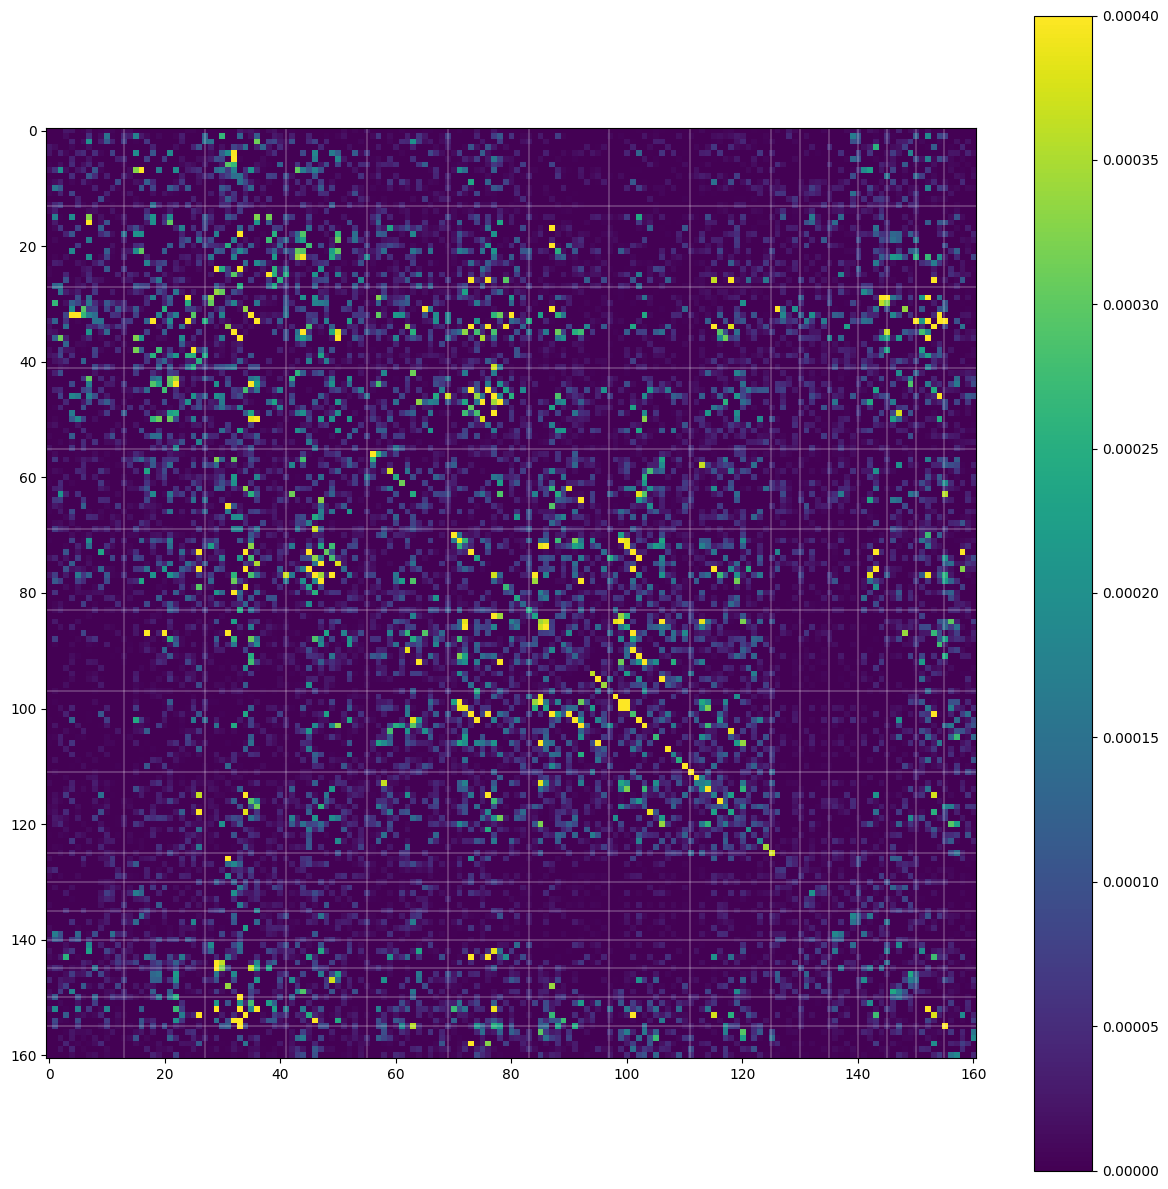

In [7]:
# plt.figure(figsize=(15,15))
# heatmap = plt.imshow(abs(qh9_1))
# colorbar = plt.colorbar(heatmap)
# heatmap.set_clim(0, 2)
# plt.show()

# plt.figure(figsize=(15,15))
# heatmap = plt.imshow(abs(pyscf_1))
# colorbar = plt.colorbar(heatmap)
# heatmap.set_clim(0, 2)
# plt.show()

plt.figure(figsize=(15,15))
heatmap = plt.imshow((qh9_1))
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 0.0004)
for i in range(len(pos)-1):
    plt.axhline(y=pos[i]-1, color='w',linewidth=0.3)
    plt.axvline(x=pos[i]-1, color='w',linewidth=0.3)
plt.show()

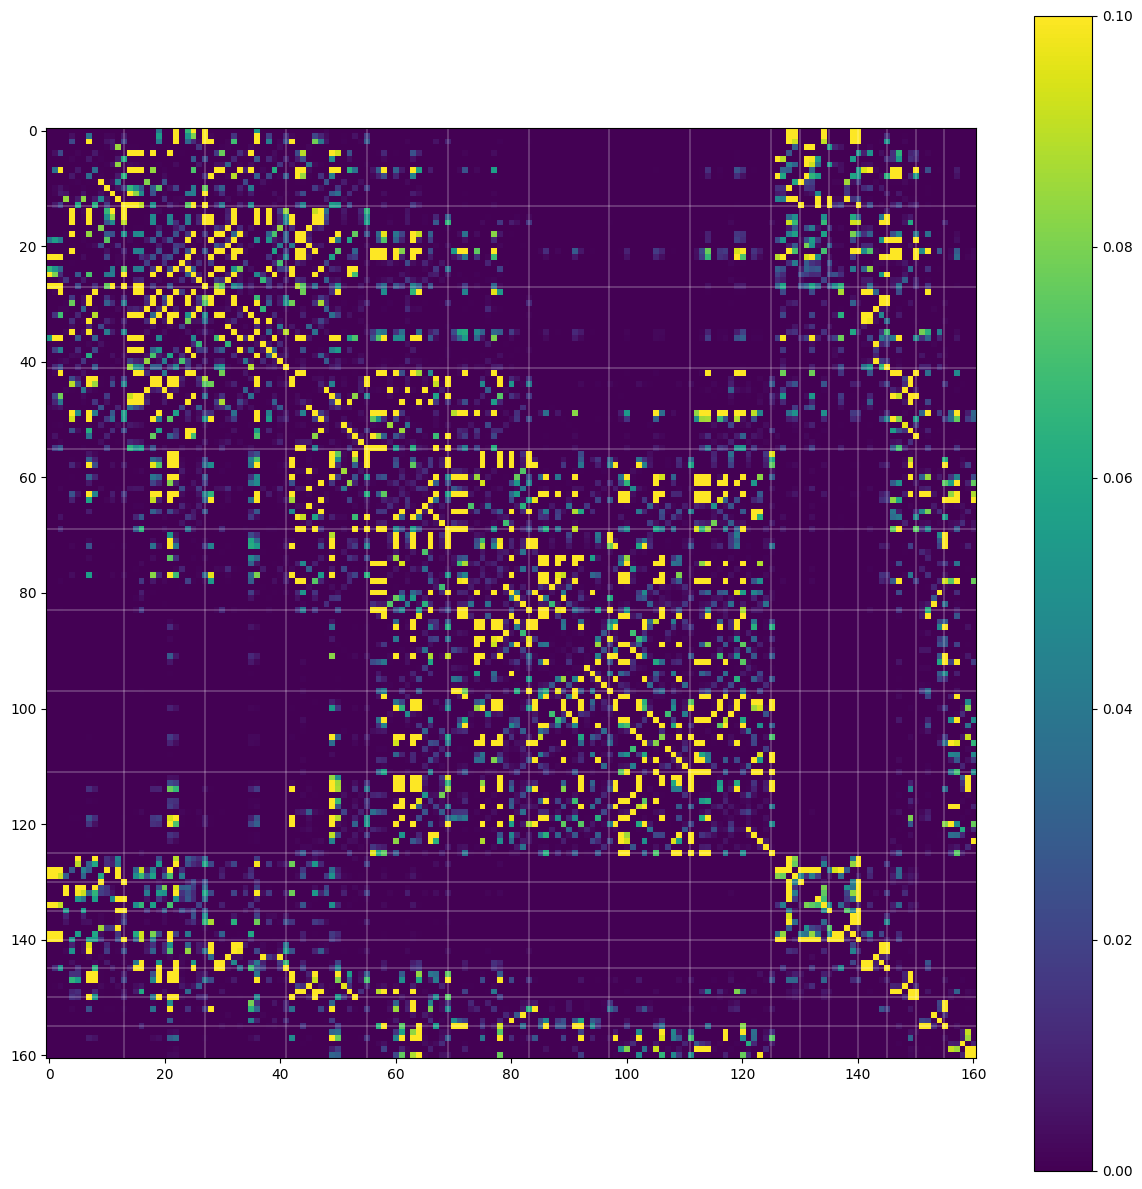

In [8]:
plt.figure(figsize=(15,15))
heatmap = plt.imshow(pyscf_1)
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 0.1)
for i in range(len(pos)-1):
    plt.axhline(y=pos[i]-1, color='w',linewidth=0.3)
    plt.axvline(x=pos[i]-1, color='w',linewidth=0.3)
plt.show()

# plt.figure(figsize=(15,15))
# heatmap = plt.imshow((qh9_1-aaa))
# colorbar = plt.colorbar(heatmap)
# heatmap.set_clim(-0.02, 0.02)
# for i in range(len(pos)-1):
#     plt.axhline(y=pos[i]-1, color='w',linewidth=0.3)
#     plt.axvline(x=pos[i]-1, color='w',linewidth=0.3)
# plt.show()

In [7]:
mean_gap = np.zeros((len(pos)-1,len(pos)-1))
for i in range(len(pos)-1):
    for j in range(len(pos)-1):
        mean_gap[i,j] = abs((qh9_1-aaa)[pos[i]:pos[i+1],pos[j]:pos[j+1]]).mean()

mean_init = np.zeros((len(pos)-1,len(pos)-1))
for i in range(len(pos)-1):
    for j in range(len(pos)-1):
        mean_init[i,j] = abs(aaa[pos[i]:pos[i+1],pos[j]:pos[j+1]]).mean()

In [40]:
A = []
B = []

In [41]:
A.append(mean_init.reshape(-1))
B.append(mean_gap.reshape(-1))

Text(0, 0.5, 'gap value')

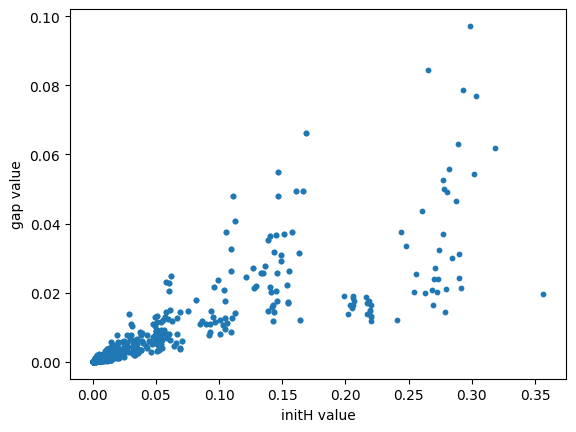

In [42]:
plt.figure()
plt.scatter(x=np.concatenate(A),y=np.concatenate(B),s=10)
plt.xlabel('initH value')
plt.ylabel('gap value')

In [39]:
from ase import Atoms
from ase.visualize import view
from ase.io import read,write
R = np.array([
       [-2.62105   , -0.515274  , -1.86216   ],
       [-0.275664  ,  1.61508   , -2.05015   ],
       [-1.18684   ,  2.07945   ,  1.0072    ],
       [ 1.30522   ,  0.99553   ,  2.68897   ],
       [-3.92301   , -0.76181   , -0.93852   ],
       [-2.67876   ,  0.813654  , -2.4023    ],
       [ 0.747262  , -1.39215   ,  0.748844  ],
       [-1.68593   ,  1.67183   , -2.63286   ],
       [ 0.00771615,  2.81152   , -1.16364   ],
       [-0.487305  ,  3.05836   ,  0.0931745 ],
       [-0.83416   ,  2.33407   ,  2.42431   ],
       [ 2.24557   , -1.83655   , -2.16159   ],
       [ 0.203462  ,  1.87462   ,  3.18035   ],
       [ 0.880422  , -0.389903  ,  3.02527   ],
       [ 0.73725   , -1.45014   ,  2.21136   ],
       [ 1.44024   , -2.61997   ,  0.171721  ],
       [ 2.10062   , -2.78109   , -0.982833  ],
       [ 3.45834   , -0.964614  , -2.19781   ],
       [ 3.78359   ,  0.0252099 ,  0.193024  ],
       [ 3.93379   , -0.113292  , -1.30851   ],
       [-3.83363   , -1.75405   ,  0.191764  ],
       [ 3.7788    ,  1.49983   ,  0.577306  ],#####
       [-1.67711   , -0.804629  , -1.32733   ],
       [-2.73013   , -1.14579   , -2.75824   ],
       [ 0.437725  ,  1.61352   , -2.90231   ],
       [-0.0530874 ,  0.618766  , -1.50297   ],
       [-2.30158   ,  2.27494   ,  0.927347  ],
       [-1.01181   ,  1.07145   ,  0.677102  ],
       [ 2.22498   ,  1.15964   ,  3.34184   ],
       [ 1.4904    ,  1.1395    ,  1.67589   ],
       [-4.84093   , -1.03031   , -1.67149   ],
       [-4.03132   ,  0.215457  , -0.515141  ],
       [-3.71283   ,  1.05491   , -2.93153   ],
       [-0.344112  , -1.39118   ,  0.436208  ],
       [ 1.09987   , -0.449295  ,  0.362114  ],
       [-1.88674   ,  2.44448   , -3.32721   ],
       [ 0.415836  ,  3.71042   , -1.70378   ],
       [-0.240377  ,  4.0808    ,  0.532179  ],
       [-1.47287   ,  3.09768   ,  2.93268   ],
       [ 1.29741   , -1.26032   , -2.21333   ],
       [ 2.27325   , -2.44245   , -3.12153   ],
       [ 0.0752529 ,  1.8835    ,  4.22656   ],
       [ 0.770563  , -0.515052  ,  4.1336    ],
       [ 0.372304  , -2.35327   ,  2.66308   ],
       [ 1.61144   , -3.47198   ,  0.987992  ],
       [ 2.46871   , -3.83068   , -1.35047   ],
       [ 4.01369   , -1.07933   , -3.08372   ],
       [ 2.94281   , -0.553763  ,  0.682046  ],
       [ 4.73583   , -0.399916  ,  0.571951  ],
       [ 4.72053   ,  0.531149  , -1.6512    ],
       [ 2.79446   ,  2.01859   ,  0.239942  ],
       [ 4.68073   ,  2.07504   ,  0.099245  ],
       [ 3.89786   ,  1.59912   ,  1.61685   ],
       ])
       # [-2.85463   , -1.33107   ,  1.041     ],
       # [-4.39937   , -2.81772   ,  0.12721   ],
       #[-2.71736   , -1.97551   ,  1.84244   ]
Z = [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1]
DHA = Atoms(numbers=Z, positions=R)
# view(DHA)
write('DHA.png', DHA)

In [ ]:
def check_array_in_list(arr, lst):
    for i in lst:
        if np.array_equal(i, arr):
            return True
    return False

In [50]:
dis = pairwise_distances(R)

In [ ]:
atom_num = [14,14,14,14,14,14,5,5,14,14,14,5,5,5,5]
pos = []
count = 0
for num in atom_num:
    count += num
    pos.append(count)

In [ ]:
eigen_ori = torch.linalg.eigvals(torch.tensor(ori))
eigen_pred = torch.linalg.eigvals(torch.tensor(pred))
abs(eigen_pred-eigen_ori).mean()

# fit curve for distance norm

In [2]:
dataset = QH9Stable(split='random')
qh9_initH = np.load('used_data/QH9_initH.npz',allow_pickle=True)['data']
# QH9 = HamiltonianDatabase("used_data/QH9.db")

In [5]:
# train1 = HamiltonianDatabase("data/MD22_pyscf/md22_DHA_1e-5.db")
train1 = HamiltonianDatabase("used_data/QH9_Dynamic.db")
# train1 = HamiltonianDatabase("data/MD22_pyscf/md22_AT-AT_1e-5.db")
# train1 = HamiltonianDatabase("bigger_mole/wanji_straight.db")
R, E, F, H, S, C, A, G, Z = train1[2]
abs(C).mean()/abs(H-C).mean()

1.3064907

In [6]:
abs(H-C).mean(), abs(H-C).std()

(0.0011513944, 0.005770996)

calculate the multiples of initial H and GAP

In [5]:
MEAN = 0
for i in range(10):
    R, E, F, H, S, C, A, G, Z = train1[i]
    MEAN+=abs(C).mean()/abs(H-C).mean()
MEAN/10

21.488923835754395

In [43]:
from dataset.hamiltonian_dataset import matrix_transform
from tqdm import tqdm

MEAN=0
for atom_index in tqdm(range(0,130000,20)):
    mask_H = [0,1,3,4,5]
    hami_full = []
    id_diag = 0
    id_non_diag = 0
    for i in range(dataset[atom_index].atoms.shape[0]):
        hami_row=[]
        for j in range(dataset[atom_index].atoms.shape[0]):
            if i==j:
                if dataset[atom_index].atoms[i]==1:
                    hami_row.append(dataset[atom_index].diagonal_hamiltonian[id_diag][mask_H,:][:,mask_H])
                else:
                    hami_row.append(dataset[atom_index].diagonal_hamiltonian[id_diag])
                id_diag+=1
            else:
                if dataset[atom_index].atoms[i]==1 and dataset[atom_index].atoms[j]==1:
                    hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag][mask_H,:][:,mask_H])
                elif dataset[atom_index].atoms[i]==1:
                    hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag][:,mask_H])
                elif dataset[atom_index].atoms[j]==1:
                    hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag][mask_H,:])
                else:
                    hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag])
                id_non_diag+=1
        tmp = np.concatenate(hami_row,axis=0)
        hami_full.append(tmp)
            
    ori = np.concatenate(hami_full,axis=1)

    initH = matrix_transform(qh9_initH[atom_index],dataset[atom_index].atoms.squeeze(-1).numpy(),convention='pyscf_def2svp')
    ori_gap=ori-initH
    MEAN+=abs(initH).mean()/abs(ori-initH).mean()
MEAN/6500

100%|██████████| 6500/6500 [03:08<00:00, 34.50it/s]


0.7402304197309614

In [44]:
MEAN/6500

14.804608394619228

fitting the curve

In [6]:
atom_index = 89000
R = dataset[atom_index].pos.numpy()

NameError: name 'dataset' is not defined

In [17]:
R, E, F, H, S, C, A, G, Z = train1[300]

In [18]:
dis = pairwise_distances(R)

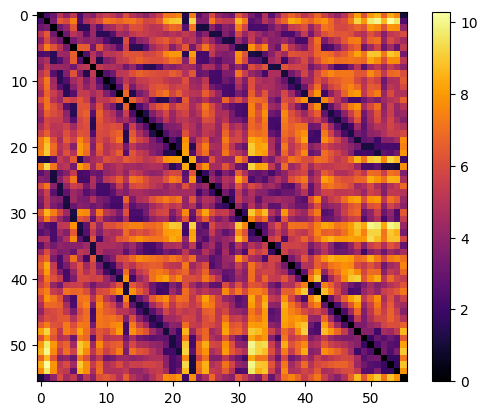

In [21]:
heatmap = plt.imshow(dis,cmap='inferno')
colorbar = plt.colorbar(heatmap)
# heatmap.set_clim(0, 2)
plt.show()

In [18]:
mask_H = [0,1,3,4,5]
hami_full = []
id_diag = 0
id_non_diag = 0
for i in range(dataset[atom_index].atoms.shape[0]):
    hami_row=[]
    for j in range(dataset[atom_index].atoms.shape[0]):
        if i==j:
            if dataset[atom_index].atoms[i]==1:
                hami_row.append(dataset[atom_index].diagonal_hamiltonian[id_diag][mask_H,:][:,mask_H])
            else:
                hami_row.append(dataset[atom_index].diagonal_hamiltonian[id_diag])
            id_diag+=1
        else:
            if dataset[atom_index].atoms[i]==1 and dataset[atom_index].atoms[j]==1:
                hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag][mask_H,:][:,mask_H])
            elif dataset[atom_index].atoms[i]==1:
                hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag][:,mask_H])
            elif dataset[atom_index].atoms[j]==1:
                hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag][mask_H,:])
            else:
                hami_row.append(dataset[atom_index].non_diagonal_hamiltonian[id_non_diag])
            id_non_diag+=1
    tmp = np.concatenate(hami_row,axis=0)
    hami_full.append(tmp)
        
ori = np.concatenate(hami_full,axis=1)

In [19]:
from dataset.hamiltonian_dataset import matrix_transform
# initH = matrix_transform(qh9_initH[atom_index],dataset[atom_index].atoms.squeeze(-1).numpy(),convention='pyscf_def2svp')
initH = matrix_transform(C,Z,convention='pyscf_def2svp')
# ori_gap=ori-initH
ori_gap=H-initH

In [20]:
# atom_num = [14, 14, 14, 14, 14, 14, 14, 14, 14, 5, 5, 5, 5, 5, 5, 5, 5, 5]
# atom_num = [5 if at==1 else 14 for at in dataset[atom_index].atoms.squeeze(-1).numpy()]
atom_num = [5 if at==1 else 14 for at in Z]
pos = [0]
count = 0
for num in atom_num:
    count += num
    pos.append(count)
# atom_num

In [2]:
pred = np.load('hami_pred_gap.npy')
ori_gap = np.load('hami_ori.npy')-np.load('hami_init.npy')
ori = np.load('hami_ori.npy')

# heatmap = plt.imshow(np.log1p(abs(pred)))
# colorbar = plt.colorbar(heatmap)
# heatmap.set_clim(0, 0.02)
# plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'hami_pred_gap.npy'

In [21]:
# mean_H = np.zeros((len(pos)-1,len(pos)-1))
# for i in range(len(pos)-1):
#     for j in range(len(pos)-1):
#         mean_H[i,j] = (H[pos[i]:pos[i+1],pos[j]:pos[j+1]]).mean()

# mean_init = np.zeros((len(pos)-1,len(pos)-1))
# for i in range(len(pos)-1):
#     for j in range(len(pos)-1):
#         mean_init[i,j] = (C[pos[i]:pos[i+1],pos[j]:pos[j+1]]).mean()

mean_gap = np.zeros((len(pos)-1,len(pos)-1))
for i in range(len(pos)-1):
    for j in range(len(pos)-1):
        mean_gap[i,j] = abs(ori_gap[pos[i]:pos[i+1],pos[j]:pos[j+1]]).mean()

Text(0.5, 1.0, 'hami value')

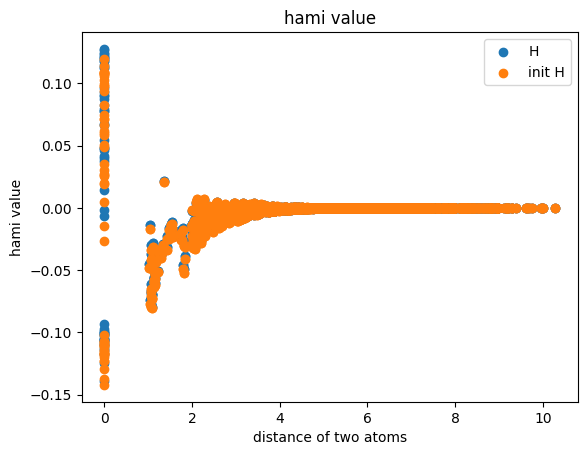

In [ ]:
plt.figure()
plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1))
plt.scatter(x=dis.reshape(-1),y=mean_init.reshape(-1))
plt.legend(['H','init H'])
plt.xlabel('distance of two atoms')
plt.ylabel('hami value')
plt.title('hami value')

Text(0.5, 1.0, 'gap value')

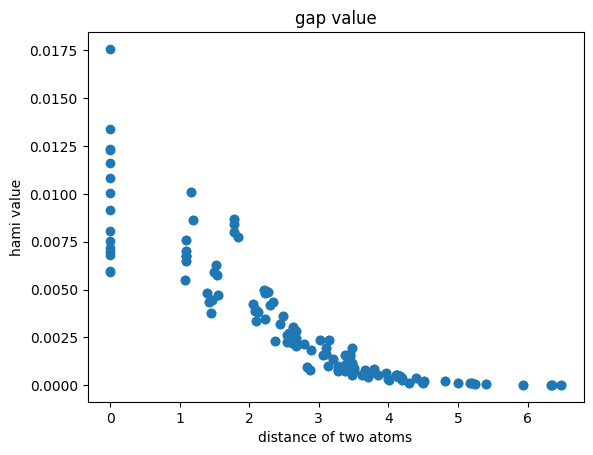

In [12]:
plt.figure()
plt.scatter(x=dis.reshape(-1),y=mean_gap.reshape(-1))
plt.xlabel('distance of two atoms')
plt.ylabel('hami value')
plt.title('gap value')

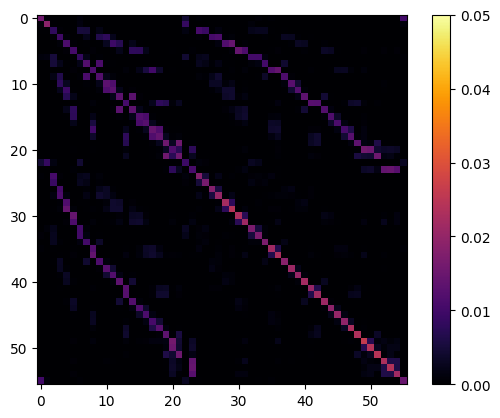

In [16]:
# plt.figure(figsize=(15,15))
heatmap = plt.imshow(mean_H,cmap='inferno')
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 0.05)
plt.show()

In [15]:
dis_all_2 = []
mean_H_all = []

In [22]:
# dis_min = np.zeros((dis.shape))
# for i in range(dis_min.shape[0]):
#     dis_min[i,:] = np.ones((dis_min[i,:].shape))*sorted(np.unique(dis[i,:]))[-2]

# dis_min = sorted(np.unique(dis))[-2]
dis_all_2.append(dis.reshape(-1))
mean_H_all.append(mean_gap.reshape(-1))
# mean_H.shape
np.concatenate(dis_all_2).shape

(650,)

In [23]:
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    # return a * np.exp(b * x) * (c * x + d)
    # return a * b**(c*x)
    return a * x*x + b*x + c

index = np.where(np.concatenate(dis_all_2)!=0)[0]
x = np.array(np.concatenate(dis_all_2))[index]
y = np.array(np.log(np.concatenate(mean_H_all)))[index]
# x = np.array([12, 8, 6, 4, 3, 2])
# y = np.array([0, 0.005, 0.01, 0.05, 0.095, 0.14])

popt, pcov = curve_fit(func, x, y, maxfev=100000)

print("a = %s" % popt[0])
print("b = %s" % popt[1])
print("c = %s" % popt[2])
# print("d = %s" % popt[3])

a = -0.09077944552142207
b = -0.5680175998129207
c = -3.6856983313779854


Text(0.5, 0, 'distance of two atoms')

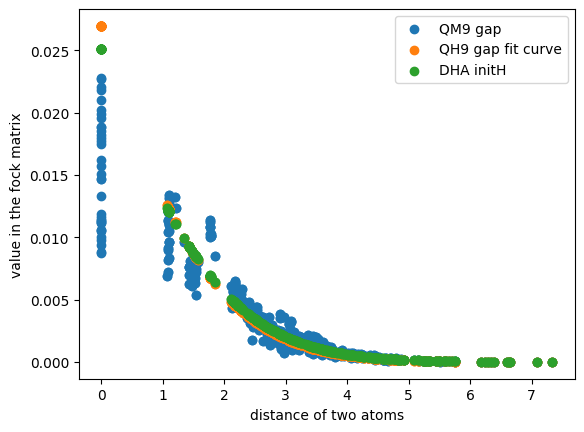

In [24]:
# # plt.figure(figsize=(15,15))
# heatmap = plt.imshow(mean_H*dis,cmap='inferno')
# colorbar = plt.colorbar(heatmap)
# # heatmap.set_clim(0, 0.1)
# plt.show()

# plt.figure(figsize=(10,10))
plt.scatter(x=np.concatenate(dis_all_2),y=np.concatenate(mean_H_all))
# plt.scatter(x=dis.reshape(-1),y=mean_gap.reshape(-1))

# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))
# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.12756673*dis.reshape(-1)*dis.reshape(-1)-0.29333599*dis.reshape(-1)-3.79694923))
# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.07715514*dis.reshape(-1)*dis.reshape(-1)-0.66498058*dis.reshape(-1)-3.48100992))

plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.09378197*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.61498875*np.concatenate(dis_all_2)-3.61389775)) # QH9 gap
plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.09077944*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.56801759*np.concatenate(dis_all_2)-3.68569833)) # QH9 gap

# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.21830536*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.39219535*np.concatenate(dis_all_2)-3.93695620)) # DHA gap
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20304791*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33431156*np.concatenate(dis_all_2)-1.51619718)) # DHA initH
# plt.scatter(x=np.concatenate(dis_all),y=np.exp(-0.11388568*np.concatenate(dis_all)*np.concatenate(dis_all)-0.98562963*np.concatenate(dis_all)-0.49690240))
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20228511*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33282985*np.concatenate(dis_all_2)-1.59293812)) # DHA
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.1407204*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.8843883*np.concatenate(dis_all_2)-0.6436178)) # Ac Ala NHMe initH
# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745))
# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.1362286*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-1.1149410*np.concatenate(dis_all_2)-3.2434601)) # Ac Ala NHMe gap
# plt.scatter(x=dis.reshape(-1),y=0.04549832*0.91481807**(8.182817153*dis.reshape(-1)))
# plt.scatter(x=dis.reshape(-1),y=-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317))
# plt.scatter(x=dis.reshape(-1),y=0.0002576446*dis.reshape(-1)*dis.reshape(-1)-0.0040825768*dis.reshape(-1)+0.0155716968)
plt.legend(['QM9 gap','QH9 gap fit curve','DHA initH','DHA',])
# plt.figure()
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all)/(np.exp(-0.09378197*np.concatenate(dis_all)*np.concatenate(dis_all)-0.61498875*np.concatenate(dis_all)-3.61389775)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0998075379*dis.reshape(-1)*dis.reshape(-1)-0.552231558*dis.reshape(-1)-3.678820348)))
# plt.xlim((0,20))
# plt.ylim((0,5))
plt.ylabel('value in the fock matrix')
plt.xlabel('distance of two atoms')

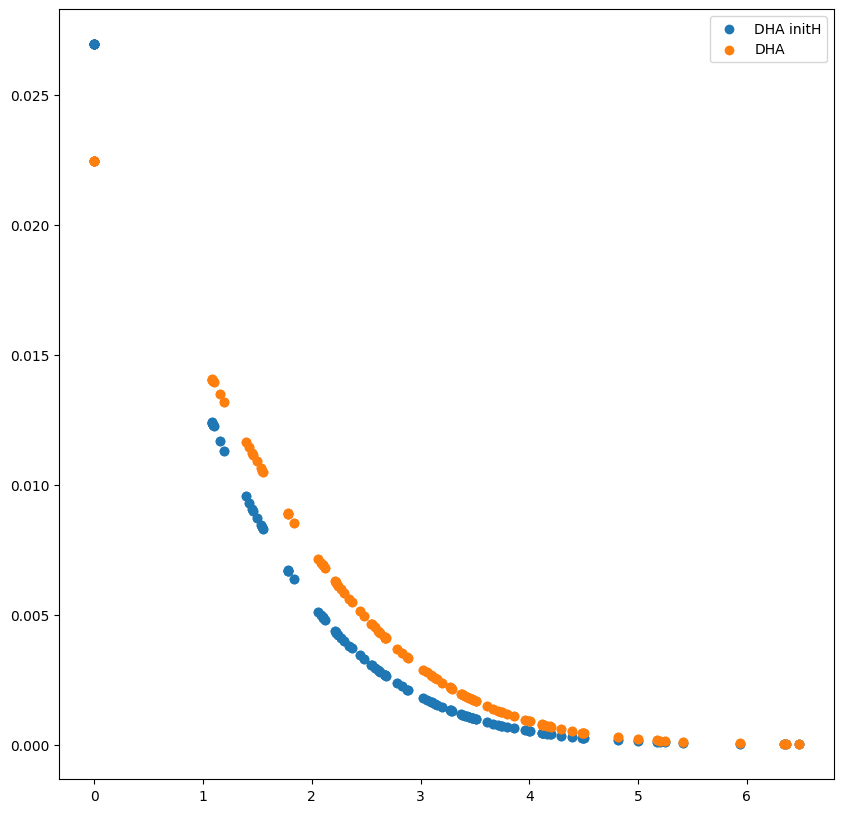

In [ ]:
# # plt.figure(figsize=(15,15))
# heatmap = plt.imshow(mean_H*dis,cmap='inferno')
# colorbar = plt.colorbar(heatmap)
# # heatmap.set_clim(0, 0.1)
# plt.show()

plt.figure(figsize=(10,10))
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all))
# plt.scatter(x=dis.reshape(-1),y=mean_gap.reshape(-1))

plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))
plt.scatter(x=dis.reshape(-1),y=np.exp(-0.12756673*dis.reshape(-1)*dis.reshape(-1)-0.29333599*dis.reshape(-1)-3.79694923))
plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))

# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.21830536*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.39219535*np.concatenate(dis_all_2)-3.93695620)) # DHA gap
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20304791*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33431156*np.concatenate(dis_all_2)-1.51619718)) # DHA initH
# plt.scatter(x=np.concatenate(dis_all),y=np.exp(-0.11388568*np.concatenate(dis_all)*np.concatenate(dis_all)-0.98562963*np.concatenate(dis_all)-0.49690240))
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20228511*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33282985*np.concatenate(dis_all_2)-1.59293812)) # DHA
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.1407204*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.8843883*np.concatenate(dis_all_2)-0.6436178)) # Ac Ala NHMe initH
# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745))
# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.1362286*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-1.1149410*np.concatenate(dis_all_2)-3.2434601)) # Ac Ala NHMe gap
# plt.scatter(x=dis.reshape(-1),y=0.04549832*0.91481807**(8.182817153*dis.reshape(-1)))
# plt.scatter(x=dis.reshape(-1),y=-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317))
# plt.scatter(x=dis.reshape(-1),y=0.0002576446*dis.reshape(-1)*dis.reshape(-1)-0.0040825768*dis.reshape(-1)+0.0155716968)
plt.legend(['DHA initH','DHA','DHA abs(gap) fit curve','QM9 gap'])
# plt.figure()
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all)/(np.exp(-0.09378197*np.concatenate(dis_all)*np.concatenate(dis_all)-0.61498875*np.concatenate(dis_all)-3.61389775)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0998075379*dis.reshape(-1)*dis.reshape(-1)-0.552231558*dis.reshape(-1)-3.678820348)))
# plt.xlim((0,20))
# plt.ylim((0,5))

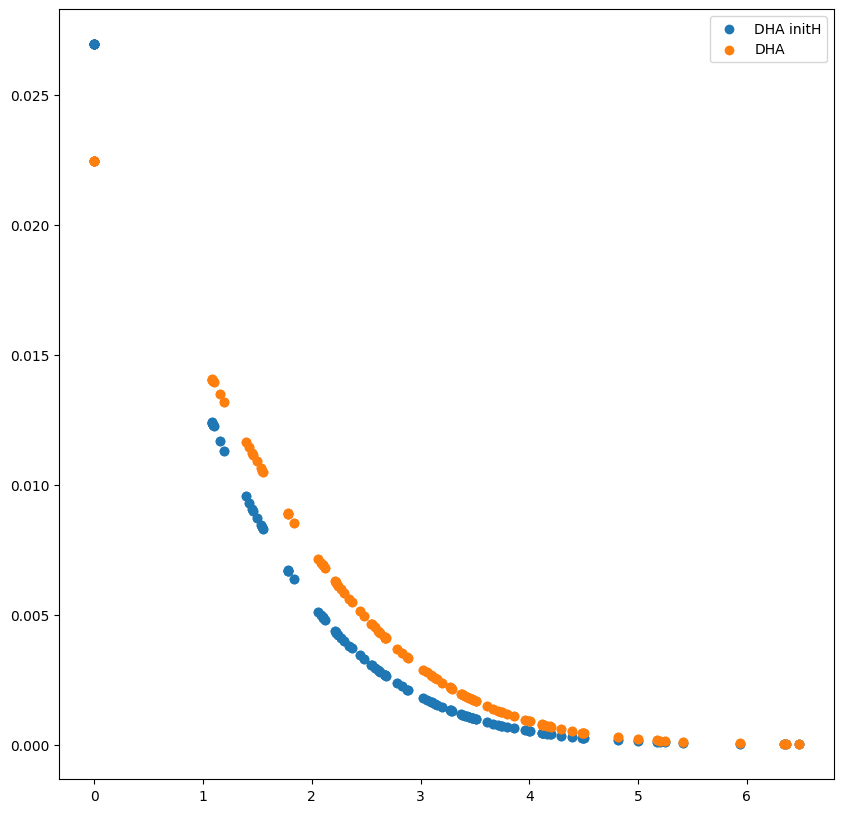

In [ ]:
# # plt.figure(figsize=(15,15))
# heatmap = plt.imshow(mean_H*dis,cmap='inferno')
# colorbar = plt.colorbar(heatmap)
# # heatmap.set_clim(0, 0.1)
# plt.show()

plt.figure(figsize=(10,10))
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all))
# plt.scatter(x=dis.reshape(-1),y=mean_gap.reshape(-1))

plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))
plt.scatter(x=dis.reshape(-1),y=np.exp(-0.12756673*dis.reshape(-1)*dis.reshape(-1)-0.29333599*dis.reshape(-1)-3.79694923))
plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))

# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.21830536*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.39219535*np.concatenate(dis_all_2)-3.93695620)) # DHA gap
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20304791*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33431156*np.concatenate(dis_all_2)-1.51619718)) # DHA initH
# plt.scatter(x=np.concatenate(dis_all),y=np.exp(-0.11388568*np.concatenate(dis_all)*np.concatenate(dis_all)-0.98562963*np.concatenate(dis_all)-0.49690240))
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20228511*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33282985*np.concatenate(dis_all_2)-1.59293812)) # DHA
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.1407204*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.8843883*np.concatenate(dis_all_2)-0.6436178)) # Ac Ala NHMe initH
# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745))
# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.1362286*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-1.1149410*np.concatenate(dis_all_2)-3.2434601)) # Ac Ala NHMe gap
# plt.scatter(x=dis.reshape(-1),y=0.04549832*0.91481807**(8.182817153*dis.reshape(-1)))
# plt.scatter(x=dis.reshape(-1),y=-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317))
# plt.scatter(x=dis.reshape(-1),y=0.0002576446*dis.reshape(-1)*dis.reshape(-1)-0.0040825768*dis.reshape(-1)+0.0155716968)
plt.legend(['DHA initH','DHA','DHA abs(gap) fit curve','QM9 gap'])
# plt.figure()
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all)/(np.exp(-0.09378197*np.concatenate(dis_all)*np.concatenate(dis_all)-0.61498875*np.concatenate(dis_all)-3.61389775)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0998075379*dis.reshape(-1)*dis.reshape(-1)-0.552231558*dis.reshape(-1)-3.678820348)))
# plt.xlim((0,20))
# plt.ylim((0,5))

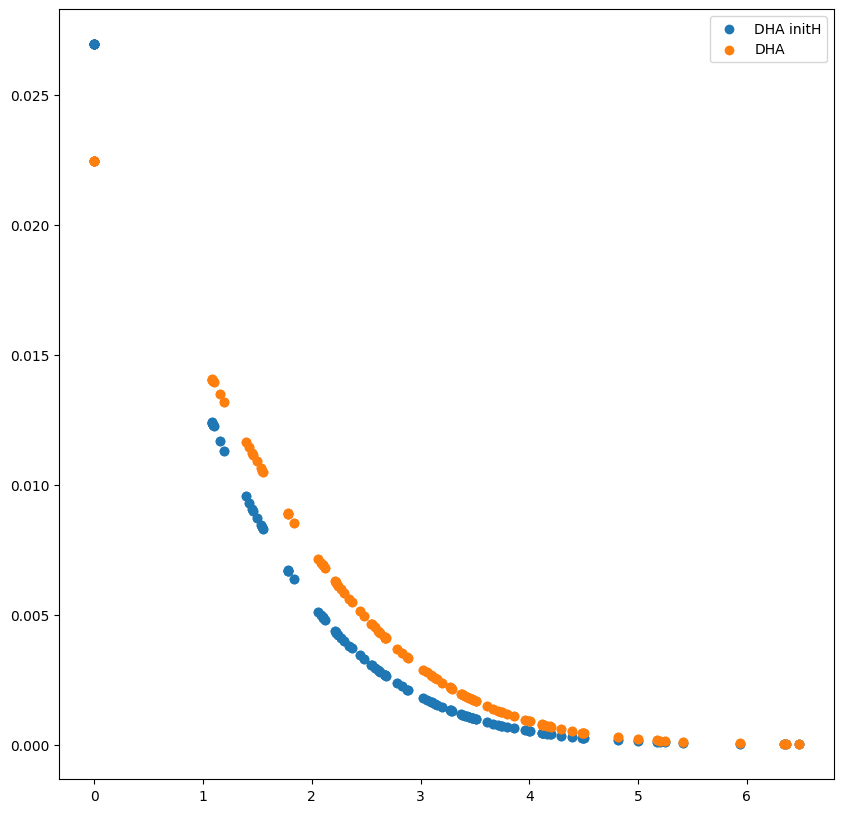

In [ ]:
# # plt.figure(figsize=(15,15))
# heatmap = plt.imshow(mean_H*dis,cmap='inferno')
# colorbar = plt.colorbar(heatmap)
# # heatmap.set_clim(0, 0.1)
# plt.show()

plt.figure(figsize=(10,10))
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all))
# plt.scatter(x=dis.reshape(-1),y=mean_gap.reshape(-1))

plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))
plt.scatter(x=dis.reshape(-1),y=np.exp(-0.12756673*dis.reshape(-1)*dis.reshape(-1)-0.29333599*dis.reshape(-1)-3.79694923))
plt.scatter(x=dis.reshape(-1),y=np.exp(-0.09378197*dis.reshape(-1)*dis.reshape(-1)-0.61498875*dis.reshape(-1)-3.61389775))

# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.21830536*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.39219535*np.concatenate(dis_all_2)-3.93695620)) # DHA gap
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20304791*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33431156*np.concatenate(dis_all_2)-1.51619718)) # DHA initH
# plt.scatter(x=np.concatenate(dis_all),y=np.exp(-0.11388568*np.concatenate(dis_all)*np.concatenate(dis_all)-0.98562963*np.concatenate(dis_all)-0.49690240))
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.20228511*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.33282985*np.concatenate(dis_all_2)-1.59293812)) # DHA
# plt.scatter(x=np.concatenate(dis_all_2),y=np.exp(-0.1407204*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-0.8843883*np.concatenate(dis_all_2)-0.6436178)) # Ac Ala NHMe initH
# plt.scatter(x=dis.reshape(-1),y=np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745))
# plt.scatter(x=np.concatenate(dis_all_2),y=14.80*np.exp(-0.1362286*np.concatenate(dis_all_2)*np.concatenate(dis_all_2)-1.1149410*np.concatenate(dis_all_2)-3.2434601)) # Ac Ala NHMe gap
# plt.scatter(x=dis.reshape(-1),y=0.04549832*0.91481807**(8.182817153*dis.reshape(-1)))
# plt.scatter(x=dis.reshape(-1),y=-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317))
# plt.scatter(x=dis.reshape(-1),y=0.0002576446*dis.reshape(-1)*dis.reshape(-1)-0.0040825768*dis.reshape(-1)+0.0155716968)
plt.legend(['DHA initH','DHA','DHA abs(gap) fit curve','QM9 gap'])
# plt.figure()
# plt.scatter(x=np.concatenate(dis_all),y=np.concatenate(mean_H_all)/(np.exp(-0.09378197*np.concatenate(dis_all)*np.concatenate(dis_all)-0.61498875*np.concatenate(dis_all)-3.61389775)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(-0.0552557*np.exp(-0.728178020*dis.reshape(-1))*(0.00028153*dis.reshape(-1)-0.82341317)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0481678*dis.reshape(-1)*dis.reshape(-1)-0.39043064*dis.reshape(-1)-3.64714745)))
# plt.scatter(x=dis.reshape(-1),y=mean_H.reshape(-1)/(np.exp(-0.0998075379*dis.reshape(-1)*dis.reshape(-1)-0.552231558*dis.reshape(-1)-3.678820348)))
# plt.xlim((0,20))
# plt.ylim((0,5))

In [ ]:
dis_mask = np.zeros((ori_gap.shape))
# dis_min_mask = np.ones((ori_gap.shape))*dis_min
for i in range(len(pos)-1):
    for j in range(len(pos)-1):
        dis_mask[pos[i]:pos[i+1],pos[j]:pos[j+1]] = dis[i,j]*np.ones((dis_mask[pos[i]:pos[i+1],pos[j]:pos[j+1]].shape))
        # dis_min_mask[pos[i]:pos[i+1],pos[j]:pos[j+1]] = dis_min*np.ones((dis_mask[pos[i]:pos[i+1],pos[j]:pos[j+1]].shape))

In [ ]:
(abs(ori_gap)/(np.exp(-0.113885687*dis_mask*dis_mask-0.985629638*dis_mask-0.496902407))).mean()#,abs(ori).mean()

In [ ]:
plt.figure(figsize=(15,15))
# heatmap = plt.imshow(abs(ori),cmap='inferno')
# heatmap = plt.imshow(-np.log(abs(ori))/dis_mask,cmap='inferno')
heatmap = plt.imshow(abs(ori_gap)/(np.exp(-0.113885687*dis_mask*dis_mask-0.985629638*dis_mask-0.496902407)),cmap='inferno')
# heatmap = plt.imshow(abs(ori_gap)/(0.045498364594*np.exp(-0.728520147984*dis_mask)),cmap='inferno')
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 2)
for i in range(len(pos)-1):
    plt.axhline(y=pos[i]-1, color='w',linewidth=1)
    plt.axvline(x=pos[i]-1, color='w',linewidth=1)
plt.show()

In [ ]:
(dis<3).sum()

In [ ]:
diag_gap=0
non_diag_gap=0
for i in range(len(pos)-1):
    for j in range(len(pos)-1):
        if dis[i,j]<3:
            diag_gap += abs(ori_gap[pos[i]:pos[i+1],pos[j]:pos[j+1]]).sum()
        else:
            non_diag_gap += abs(ori_gap[pos[i]:pos[i+1],pos[j]:pos[j+1]]).sum()
print(diag_gap,non_diag_gap)

In [ ]:
plt.figure(figsize=(15,15))
# heatmap = plt.imshow(abs((pred-ori_gap)/ori_gap))#,cmap='inferno')
heatmap = plt.imshow(abs((pred-ori_gap)),cmap='inferno')
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 0.003)
for i in range(len(pos)-1):
    plt.axhline(y=pos[i]-1, color='r',linewidth=1)
    plt.axvline(x=pos[i]-1, color='r',linewidth=1)
plt.show()

In [ ]:
plt.figure(figsize=(15,15))
heatmap = plt.imshow(np.log1p(abs(pred)),cmap='inferno')
colorbar = plt.colorbar(heatmap)
heatmap.set_clim(0, 0.01)
for i in range(len(pos)-1):
    plt.axhline(y=pos[i]-1, color='w',linewidth=1)
    plt.axvline(x=pos[i]-1, color='w',linewidth=1)
plt.show()

In [ ]:
abs(pred-ori).max()
# abs(pred).max()

In [ ]:
data = np.load('dataset/QM9_6-31G/annoscfanalysis/anno.fock.0288.npz',allow_pickle=True)
data['data'][0].keys()

In [ ]:
abs(data['data'][40]['fock']).mean(),data['data'][40]['fock'].shape
# data['data'][0]['mol']


In [ ]:
dict = eval(data['data'][40]['mol'].replace('false','False').replace('null','"none"').replace('true','True'))
dict['_atom']

In [ ]:
data['data'][4]['scf_summary'].item()['e1']

In [ ]:
force = np.load('dataset/QM9_6-31G/force/anno.force.0000.npz',allow_pickle=True)

In [ ]:
# force['data'][0]['true_total_force'].shape
force['data'][0]['name']

In [ ]:
data = np.load('dataset/QM9_npz/qm9_5.npz',allow_pickle=True)
# data['data'][0].keys()
data['data'][55]['atom_number'],abs(data['data'][55]['Hamiltonian']).mean(),data['data'][55]['Hamiltonian'].shape

In [2]:
data = np.load('/home/weixinran/erpailuo/allegro/benchmark_data/aspirin_ccsd-train.npz',allow_pickle=True)
# data['data'].shape
data.__dict__

{'_files': ['E.npy',
  'name.npy',
  'F.npy',
  'theory.npy',
  'R.npy',
  'z.npy',
  'type.npy',
  'md5.npy'],
 'files': ['E', 'name', 'F', 'theory', 'R', 'z', 'type', 'md5'],
 'allow_pickle': True,
 'max_header_size': 10000,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='/home/weixinran/erpailuo/allegro/benchmark_data/aspirin_ccsd-train.npz'> mode='r'>,
 'f': <numpy.lib.npyio.BagObj at 0x7f835241d760>,
 'fid': <_io.BufferedReader name='/home/weixinran/erpailuo/allegro/benchmark_data/aspirin_ccsd-train.npz'>}

In [ ]:
# abs(train1[1][3]-data['data'][1]).mean()
data['R'][0]

In [ ]:
data = np.load('dataset/QH9/QH9Stable.db',allow_pickle=True)
# data['data'].shape
data.__dict__